# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.8.3-beta.new.224.fix.248'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

184

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **12th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{3: ['Holy See'],
 4: ['Tanzania', 'Hungary'],
 5: ['Slovakia', 'Fiji', 'Papua New Guinea', 'Jordan', 'Grenada', 'Uganda',
     'Brunei', 'Georgia', 'Myanmar'],
 6: ['Ireland', 'Antigua and Barbuda', 'Trinidad and Tobago', 'Cambodia',
     'Slovenia', 'Montenegro', 'Equatorial Guinea', 'Yemen', 'Mauritius',
     'Libya', 'Tunisia', 'Jamaica', 'Andorra', 'Spain', 'Czech Republic',
     'Belize'],
 7: ['Zimbabwe', 'Central African Republic', 'Bahamas', 'Netherlands',
     'Australia', 'Guinea-Bissau', 'South Sudan', 'Colombia', 'Iceland',
     'Gambia', 'Saint Vincent and the Grenadines', 'Kazakhstan', 'Niger',
     'Malawi', 'Seychelles', 'Paraguay', 'Dominica', 'Sao Tome and Principe',
     'Angola'],
 8: ['Nicaragua', 'Zambia', 'Israel', 'Namibia', 'San Marino', 'Austria',
     'Burundi', 'Eritrea', 'Guyana', 'Malta', 'Mongolia', 'Cyprus',
     'Liechtenstein', 'Lebanon', 'Bhutan', 'Palestine', 'Botswana',
     'Madagascar', 'Argentina', 'Thailand', 'Nepal', 'Denmark', 'Kyrgyzstan',
 

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=12)
# The number of countries
len(analyser.countries)

17

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{12: ['Italy', 'Kuwait', 'Brazil', 'Dominican Republic', 'Mexico', 'France',
      'Algeria', 'Bahrain', 'Turkey', 'Nigeria', 'United States', 'Iran',
      'United Arab Emirates', 'Latvia', 'Iraq'],
 13: ['Bolivia'],
 14: ['Russia']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Russia  0th    Past  12Feb2020  07May2020   330457362
        1st    Past  08May2020  18May2020   330457362
        2nd    Past  19May2020  30May2020   330457362
        3rd    Past  31May2020  10Jun2020   330457362
        4th    Past  11Jun2020  20Jun2020   330457362
        5th    Past  21Jun2020  03Jul2020   330457362
        6th    Past  04Jul2020  17Jul2020   330457362
        7th    Past  18Jul2020  01Aug2020   330457362
        8th    Past  02Aug2020  16Aug2020   330457362
        9th    Past  17Aug2020  02Sep2020   330457362
        10th   Past  03Sep2020  18Sep2020   330457362
        11th   Past  19Sep2020  01Oct2020   330457362
        12th   Past  02Oct2020  10Oct2020   330457362
        13th   Past  11Oct2020  19Oct2020   330457362

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	DOM,  5th phase (24Jul2020 - 01Aug2020): finished 1471 trials in 1 min  0 sec

	RUS,  5th phase (21Jun2020 - 03Jul2020): finished 1464 trials in 1 min  0 sec

	LVA,  4th phase (08May2020 - 15May2020): finished 1471 trials in 1 min  0 sec

	LVA,  3rd phase (30Apr2020 - 07May2020): finished 1699 trials in 1 min  0 sec

	DZA,  7th phase (02Aug2020 - 09Aug2020): finished  197 trials in 0 min  5 sec

	KWT,  8th phase (21Aug2020 - 04Sep2020): finished 1751 trials in 1 min  0 sec

	MEX,  5th phase (18Jul2020 - 29Jul2020): finished 1733 trials in 1 min  0 sec

	LVA,  9th phase (30Aug2020 - 17Sep2020): finished 1961 trials in 1 min  0 sec

	RUS,  8th phase (02Aug2020 - 16Aug2020): finished 1713 trials in 1 min  0 sec

	NGA,  8th phase (08Aug2020 - 18Aug2020): finished  392 trials in 0 min 10 sec

	IRN,  6th phase (17Jul2020 - 31Jul2020): finished  206 trials in 0 min  5 sec

	IRQ,  4th phase (07Aug2020 - 16Aug2020): finished  561 trials in 0 min 15 sec

	KWT,  4th phase (24Jun2020 - 06Jul2020): finished 1701 trials in 1 min  0 sec

	BRA,  1st phase (27May2020 - 14Jun2020): finished 1673 trials in 1 min  0 sec

	DOM,  7th phase (12Aug2020 - 20Aug2020): finished  357 trials in 0 min 10 sec

	MEX,  0th phase (03Mar2020 - 22May2020): finished 1577 trials in 1 min  0 sec

	NGA,  0th phase (18Mar2020 - 22May2020): finished 1598 trials in 1 min  0 sec

	IRQ,  3rd phase (25Jul2020 - 06Aug2020): finished  998 trials in 0 min 30 sec

	BHR,  8th phase (03Sep2020 - 13Sep2020): finished 1586 trials in 1 min  0 sec

	IRN,  3rd phase (29May2020 - 14Jun2020): finished 1538 trials in 1 min  0 sec

	RUS, 11th phase (19Sep2020 - 01Oct2020): finished 1467 trials in 1 min  0 sec

	USA,  7th phase (08Aug2020 - 19Aug2020): finished  489 trials in 0 min 20 sec

	BRA,  0th phase (16Mar2020 - 26May2020): finished 1238 trials in 1 min  0 sec

	FRA,  0th phase (12Feb2020 - 24Mar2020): finished 1127 trials in 1 min  0 sec

	TUR,  1st phase (17Apr2020 - 26Apr2020): finished 1299 trials in 1 min  0 sec

	KWT,  7th phase (07Aug2020 - 20Aug2020): finished  280 trials in 0 min 10 sec

	IRQ,  9th phase (22Sep2020 - 29Sep2020): finished  166 trials in 0 min  5 sec

	ARE,  0th phase (12Feb2020 - 30Apr2020): finished 1280 trials in 1 min  0 sec

	LVA,  2nd phase (18Apr2020 - 29Apr2020): finished 1516 trials in 1 min  0 sec

	DOM,  6th phase (02Aug2020 - 11Aug2020): finished 1288 trials in 1 min  0 sec

	KWT,  9th phase (05Sep2020 - 17Sep2020): finished 1259 trials in 1 min  0 sec

	MEX,  3rd phase (24Jun2020 - 05Jul2020): finished  446 trials in 0 min 20 sec

	BHR,  3rd phase (14Jun2020 - 25Jun2020): finished 1184 trials in 1 min  0 sec

	KWT,  3rd phase (08Jun2020 - 23Jun2020): finished 1180 trials in 1 min  0 sec

	BOL,  6th phase (01Aug2020 - 09Aug2020): finished  231 trials in 0 min 10 sec

	DOM,  3rd phase (03Jul2020 - 14Jul2020): finished 1054 trials in 1 min  0 sec

	KWT,  1st phase (13May2020 - 27May2020): finished 1042 trials in 1 min  0 sec

	ITA,  4th phase (24Apr2020 - 10May2020): finished 1043 trials in 1 min  0 sec

	MEX,  7th phase (11Aug2020 - 24Aug2020): finished 1068 trials in 1 min  0 sec

	BRA,  9th phase (31Aug2020 - 10Sep2020): finished  348 trials in 0 min 15 sec

	KWT,  0th phase (08Mar2020 - 12May2020): finished  902 trials in 1 min  0 sec

	ARE,  3rd phase (27May2020 - 11Jun2020): finished 1121 trials in 1 min  0 sec

	ITA,  5th phase (11May2020 - 27May2020): finished  356 trials in 0 min 15 sec

	LVA, 10th phase (18Sep2020 - 25Sep2020): finished 1274 trials in 1 min  0 sec

	BOL,  9th phase (26Aug2020 - 02Sep2020): finished  241 trials in 0 min 10 sec

	MEX,  2nd phase (10Jun2020 - 23Jun2020): finished  454 trials in 0 min 20 sec

	ITA,  1st phase (21Mar2020 - 28Mar2020): finished 1114 trials in 1 min  0 sec

	ARE,  7th phase (19Aug2020 - 10Sep2020): finished 1064 trials in 1 min  0 sec

	ARE,  4th phase (12Jun2020 - 01Jul2020): finished 1080 trials in 1 min  0 sec

	ARE,  1st phase (01May2020 - 15May2020): finished 1105 trials in 1 min  0 sec

	DZA,  5th phase (17Jul2020 - 24Jul2020): finished 1146 trials in 1 min  0 sec

	ITA,  6th phase (28May2020 - 21Jul2020): finished  818 trials in 0 min 40 sec

	ITA,  9th phase (18Sep2020 - 29Sep2020): finished  136 trials in 0 min  5 sec

	NGA,  6th phase (18Jul2020 - 27Jul2020): finished  393 trials in 0 min 15 sec

	USA,  5th phase (18Jul2020 - 28Jul2020): finished  274 trials in 0 min 10 sec

	DZA, 11th phase (18Sep2020 - 19Oct2020): finished  266 trials in 0 min 10 sec

	IRN, 10th phase (24Sep2020 - 06Oct2020): finished  138 trials in 0 min  5 sec

	RUS, 12th phase (02Oct2020 - 10Oct2020): finished 1207 trials in 1 min  0 sec

	IRN, 11th phase (07Oct2020 - 19Oct2020): finished 1227 trials in 1 min  0 sec

	RUS,  6th phase (04Jul2020 - 17Jul2020): finished 1262 trials in 1 min  0 sec

	LVA,  6th phase (01Jun2020 - 08Jul2020): finished 1256 trials in 1 min  0 sec

	IRN,  7th phase (01Aug2020 - 17Aug2020): finished 1280 trials in 1 min  0 sec

	DZA,  6th phase (25Jul2020 - 01Aug2020): finished  160 trials in 0 min  5 sec

	MEX, 10th phase (24Sep2020 - 04Oct2020): finished  153 trials in 0 min  5 sec

	BHR,  7th phase (12Aug2020 - 02Sep2020): finished 1276 trials in 1 min  0 sec

	BOL,  3rd phase (06Jul2020 - 14Jul2020): finished  764 trials in 0 min 30 sec

	MEX,  4th phase (06Jul2020 - 17Jul2020): finished  151 trials in 0 min  5 sec

	USA,  9th phase (04Sep2020 - 18Sep2020): finished 1157 trials in 0 min 50 sec

	IRN,  1st phase (31Mar2020 - 03May2020): finished 1300 trials in 1 min  0 sec

	TUR,  0th phase (24Mar2020 - 16Apr2020): finished 1328 trials in 1 min  0 sec

	USA,  6th phase (29Jul2020 - 07Aug2020): finished  419 trials in 0 min 15 sec

	IRQ,  5th phase (17Aug2020 - 26Aug2020): finished  158 trials in 0 min  5 sec

	DZA,  2nd phase (25May2020 - 24Jun2020): finished 1320 trials in 1 min  0 sec

	NGA,  3rd phase (19Jun2020 - 28Jun2020): finished 1352 trials in 1 min  0 sec

	ARE,  6th phase (21Jul2020 - 18Aug2020): finished  958 trials in 0 min 40 sec

	IRN,  8th phase (18Aug2020 - 07Sep2020): finished  156 trials in 0 min  5 sec

	DZA,  4th phase (08Jul2020 - 16Jul2020): finished  785 trials in 0 min 30 sec

	TUR,  9th phase (02Sep2020 - 17Sep2020): finished  146 trials in 0 min  5 sec

	FRA,  2nd phase (06Apr2020 - 20Apr2020): finished 1390 trials in 1 min  0 sec

	ARE,  2nd phase (16May2020 - 26May2020): finished 1408 trials in 1 min  0 sec

	IRQ,  1st phase (23Jun2020 - 08Jul2020): finished 1393 trials in 1 min  0 sec

	NGA,  1st phase (23May2020 - 08Jun2020): finished 1450 trials in 1 min  0 sec

	FRA,  3rd phase (21Apr2020 - 04May2020): finished 1435 trials in 1 min  0 sec

	FRA,  7th phase (10Aug2020 - 26Aug2020): finished 1142 trials in 0 min 45 sec

	RUS,  2nd phase (19May2020 - 30May2020): finished 1471 trials in 1 min  0 sec

	NGA,  4th phase (29Jun2020 - 07Jul2020): finished  177 trials in 0 min  5 sec

	KWT, 11th phase (04Oct2020 - 19Oct2020): finished 1444 trials in 1 min  0 sec

	BOL,  0th phase (01Apr2020 - 13Jun2020): finished 1405 trials in 1 min  0 sec

	DZA,  0th phase (12Mar2020 - 01May2020): finished 1423 trials in 1 min  0 sec

	IRN,  0th phase (26Feb2020 - 30Mar2020): finished 1434 trials in 1 min  0 sec

	FRA,  1st phase (25Mar2020 - 05Apr2020): finished 1439 trials in 1 min  0 sec

	TUR,  4th phase (22May2020 - 13Jun2020): finished 1436 trials in 1 min  0 sec

	RUS,  4th phase (11Jun2020 - 20Jun2020): finished 1411 trials in 1 min  0 sec

	BHR,  5th phase (08Jul2020 - 22Jul2020): finished 1395 trials in 1 min  0 sec

	BRA,  2nd phase (15Jun2020 - 26Jun2020): finished  456 trials in 0 min 15 sec

	MEX,  8th phase (25Aug2020 - 07Sep2020): finished 1478 trials in 1 min  0 sec

	MEX,  6th phase (30Jul2020 - 10Aug2020): finished 1466 trials in 1 min  0 sec

	DZA,  1st phase (02May2020 - 24May2020): finished 1468 trials in 1 min  0 sec

	LVA,  0th phase (10Mar2020 - 05Apr2020): finished 1897 trials in 1 min  0 sec

	RUS,  3rd phase (31May2020 - 10Jun2020): finished 1841 trials in 1 min  0 sec

	NGA, 11th phase (29Sep2020 - 19Oct2020): finished 1842 trials in 1 min  0 sec

	BRA, 11th phase (25Sep2020 - 19Oct2020): finished 1825 trials in 1 min  0 sec

	NGA,  5th phase (08Jul2020 - 17Jul2020): finished 1180 trials in 0 min 30 sec

	ITA,  2nd phase (29Mar2020 - 10Apr2020): finished 1959 trials in 1 min  0 sec

	DZA,  9th phase (21Aug2020 - 31Aug2020): finished  253 trials in 0 min  5 sec

	IRQ,  8th phase (13Sep2020 - 21Sep2020): finished  255 trials in 0 min  5 sec

	BOL,  4th phase (15Jul2020 - 22Jul2020): finished 1993 trials in 1 min  0 sec

	BHR,  2nd phase (01Jun2020 - 13Jun2020): finished 1985 trials in 1 min  0 sec

	KWT, 10th phase (18Sep2020 - 03Oct2020): finished  252 trials in 0 min  5 sec

	LVA, 11th phase (26Sep2020 - 19Oct2020): finished  753 trials in 0 min 15 sec

	MEX,  1st phase (23May2020 - 09Jun2020): finished  250 trials in 0 min  5 sec

	USA,  2nd phase (03Jun2020 - 24Jun2020): finished 1718 trials in 0 min 50 sec

	RUS, 13th phase (11Oct2020 - 19Oct2020): finished 1968 trials in 1 min  0 sec

	FRA,  5th phase (31May2020 - 10Jul2020): finished 1945 trials in 1 min  0 sec

	TUR,  3rd phase (07May2020 - 21May2020): finished 1966 trials in 1 min  0 sec

	BOL, 10th phase (03Sep2020 - 11Sep2020): finished  849 trials in 0 min 20 sec

	LVA,  5th phase (16May2020 - 31May2020): finished 2237 trials in 1 min  0 sec

	BRA,  5th phase (21Jul2020 - 29Jul2020): finished 1972 trials in 1 min  0 sec

	IRQ,  2nd phase (09Jul2020 - 24Jul2020): finished 1980 trials in 1 min  0 sec

	RUS, 10th phase (03Sep2020 - 18Sep2020): finished 1989 trials in 1 min  0 sec

	FRA,  4th phase (05May2020 - 30May2020): finished 1969 trials in 1 min  0 sec

	NGA,  7th phase (28Jul2020 - 07Aug2020): finished 1985 trials in 1 min  0 sec

	FRA,  6th phase (11Jul2020 - 09Aug2020): finished  442 trials in 0 min 10 sec

	RUS,  1st phase (08May2020 - 18May2020): finished 1984 trials in 1 min  0 sec

	ITA, 11th phase (08Oct2020 - 19Oct2020): finished  254 trials in 0 min  5 sec

	ITA,  3rd phase (11Apr2020 - 23Apr2020): finished 1984 trials in 1 min  0 sec

	IRQ,  7th phase (04Sep2020 - 12Sep2020): finished  256 trials in 0 min  5 sec

	BHR,  1st phase (07May2020 - 31May2020): finished 1959 trials in 1 min  0 sec

	ITA,  7th phase (22Jul2020 - 28Aug2020): finished 1971 trials in 1 min  0 sec

	KWT,  6th phase (22Jul2020 - 06Aug2020): finished  657 trials in 0 min 15 sec

	BHR,  4th phase (26Jun2020 - 07Jul2020): finished  253 trials in 0 min  5 sec

	BRA,  6th phase (30Jul2020 - 09Aug2020): finished  669 trials in 0 min 15 sec

	ARE,  9th phase (23Sep2020 - 02Oct2020): finished  669 trials in 0 min 15 sec

	TUR,  6th phase (01Jul2020 - 21Jul2020): finished  245 trials in 0 min  5 sec

	BOL,  5th phase (23Jul2020 - 31Jul2020): finished  473 trials in 0 min 10 sec

	BHR,  0th phase (06Mar2020 - 06May2020): finished 1929 trials in 1 min  0 sec

	LVA,  8th phase (07Aug2020 - 29Aug2020): finished 2236 trials in 1 min  0 sec

	BRA,  4th phase (09Jul2020 - 20Jul2020): finished  449 trials in 0 min 10 sec

	IRQ,  0th phase (09Mar2020 - 22Jun2020): finished 1883 trials in 1 min  0 sec

	TUR,  7th phase (22Jul2020 - 13Aug2020): finished  467 trials in 0 min 10 sec

	USA,  8th phase (20Aug2020 - 03Sep2020): finished  252 trials in 0 min  5 sec

	IRN,  2nd phase (04May2020 - 28May2020): finished 1974 trials in 1 min  0 sec

	DZA, 10th phase (01Sep2020 - 17Sep2020): finished  252 trials in 0 min  5 sec

	ITA,  8th phase (29Aug2020 - 17Sep2020): finished  252 trials in 0 min  5 sec

	BHR, 10th phase (23Sep2020 - 03Oct2020): finished  255 trials in 0 min  5 sec

	NGA, 10th phase (03Sep2020 - 28Sep2020): finished 1965 trials in 1 min  0 sec

	RUS,  9th phase (17Aug2020 - 02Sep2020): finished 1997 trials in 1 min  0 sec

	ARE,  8th phase (11Sep2020 - 22Sep2020): finished 1020 trials in 0 min 25 sec

	DZA,  3rd phase (25Jun2020 - 07Jul2020): finished  254 trials in 0 min  5 sec

	FRA,  8th phase (27Aug2020 - 10Sep2020): finished 1330 trials in 0 min 35 sec

	RUS,  0th phase (12Feb2020 - 07May2020): finished 1920 trials in 1 min  0 sec

	TUR,  2nd phase (27Apr2020 - 06May2020): finished  332 trials in 0 min 10 sec

	IRQ,  6th phase (27Aug2020 - 03Sep2020): finished  189 trials in 0 min  5 sec

	BRA,  8th phase (20Aug2020 - 30Aug2020): finished 1741 trials in 1 min  0 sec

	DOM,  1st phase (23May2020 - 15Jun2020): finished 1648 trials in 1 min  0 sec

	BHR,  9th phase (14Sep2020 - 22Sep2020): finished  509 trials in 0 min 15 sec

	BRA, 10th phase (11Sep2020 - 24Sep2020): finished 1626 trials in 1 min  0 sec

	BOL,  2nd phase (26Jun2020 - 05Jul2020): finished  332 trials in 0 min 10 sec

	USA, 10th phase (19Sep2020 - 02Oct2020): finished  731 trials in 0 min 25 sec

	LVA,  1st phase (06Apr2020 - 17Apr2020): finished 1673 trials in 1 min  0 sec

	TUR,  8th phase (14Aug2020 - 01Sep2020): finished  348 trials in 0 min 10 sec

	RUS,  7th phase (18Jul2020 - 01Aug2020): finished 1434 trials in 1 min  0 sec

	FRA, 11th phase (09Oct2020 - 19Oct2020): finished  947 trials in 0 min 35 sec

	USA,  0th phase (09Feb2020 - 02May2020): finished 1398 trials in 1 min  0 sec

	NGA,  9th phase (19Aug2020 - 02Sep2020): finished  460 trials in 0 min 15 sec

	BOL,  8th phase (18Aug2020 - 25Aug2020): finished  558 trials in 0 min 20 sec

	BHR,  6th phase (23Jul2020 - 11Aug2020): finished  309 trials in 0 min 10 sec

	TUR,  5th phase (14Jun2020 - 30Jun2020): finished 1440 trials in 1 min  0 sec

	DOM,  2nd phase (16Jun2020 - 02Jul2020): finished 1477 trials in 1 min  0 sec

	DOM,  4th phase (15Jul2020 - 23Jul2020): finished  356 trials in 0 min 10 sec

	ARE, 10th phase (03Oct2020 - 10Oct2020): finished  184 trials in 0 min  5 sec

	DOM,  0th phase (24Mar2020 - 22May2020): finished 1426 trials in 1 min  0 sec

	USA, 11th phase (03Oct2020 - 19Oct2020): finished  539 trials in 0 min 15 sec

	DZA,  8th phase (10Aug2020 - 20Aug2020): finished  381 trials in 0 min 10 sec

	BRA,  3rd phase (27Jun2020 - 08Jul2020): finished 1834 trials in 1 min  0 sec

	NGA,  2nd phase (09Jun2020 - 18Jun2020): finished 1846 trials in 1 min  0 sec

	MEX, 11th phase (05Oct2020 - 19Oct2020): finished  253 trials in 0 min  5 sec

	BOL, 11th phase (12Sep2020 - 24Sep2020): finished  465 trials in 0 min 10 sec

	BRA,  7th phase (10Aug2020 - 19Aug2020): finished 1952 trials in 1 min  0 sec

	ITA, 10th phase (30Sep2020 - 07Oct2020): finished  462 trials in 0 min 10 sec

	KWT,  2nd phase (28May2020 - 07Jun2020): finished 1924 trials in 1 min  0 sec

	BOL,  7th phase (10Aug2020 - 17Aug2020): finished  462 trials in 0 min 10 sec

	USA,  1st phase (03May2020 - 02Jun2020): finished 1739 trials in 1 min  0 sec

	LVA,  7th phase (09Jul2020 - 06Aug2020): finished 1971 trials in 1 min  0 sec

	IRN,  4th phase (15Jun2020 - 30Jun2020): finished 1629 trials in 1 min  0 sec

	MEX,  9th phase (08Sep2020 - 23Sep2020): finished 1610 trials in 1 min  0 sec

	FRA, 10th phase (25Sep2020 - 08Oct2020): finished  529 trials in 0 min 15 sec

	ARE,  5th phase (02Jul2020 - 20Jul2020): finished 1736 trials in 1 min  0 sec

	KWT,  5th phase (07Jul2020 - 21Jul2020): finished 1839 trials in 1 min  0 sec

	ITA,  0th phase (24Feb2020 - 20Mar2020): finished 1813 trials in 1 min  0 sec

	IRN,  5th phase (01Jul2020 - 16Jul2020): finished  215 trials in 0 min  5 sec

Completed optimization. Total: 37 min  9 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt     theta  \
Country Phase                                                                  
Russia  0th    Past  12Feb2020  07May2020   330457362  SIR-F  0.02  0.602763   
        1st    Past  08May2020  18May2020   330457362  SIR-F  2.40  0.000593   
        2nd    Past  19May2020  30May2020   330457362  SIR-F  1.04  0.000327   
        3rd    Past  31May2020  10Jun2020   330457362  SIR-F  0.95  0.018133   
        4th    Past  11Jun2020  20Jun2020   330457362  SIR-F  1.01  0.018282   
        5th    Past  21Jun2020  03Jul2020   330457362  SIR-F  1.06  0.018343   
        6th    Past  04Jul2020  17Jul2020   330457362  SIR-F  0.82  0.025150   
        7th    Past  18Jul2020  01Aug2020   330457362  SIR-F  0.70  0.018690   
        8th    Past  02Aug2020  16Aug2020   330457362  SIR-F  0.74  0.016738   
        9th    Past  17Aug2020  02Sep2020   330457362  SIR-F  0.81  0.018083   
        10th   Past  03Sep2020  18Sep2020   330457362  SIR-F  1.02  0.001628   
        11th   Past  19Sep2020  01Oct2020   330457362  SIR-F  1.58  0.000859   
        12th   Past  02Oct2020  10Oct2020   330457362  SIR-F  1.94  0.001370   
        13th   Past  11Oct2020  19Oct2020   330457362  SIR-F  2.11  0.000019   

                  kappa       rho     sigma  tau  1/beta [day]  \
Country Phase                                                    
Russia  0th    0.544883  0.033660  0.002318  360             7   
        1st    0.000114  0.011793  0.004805  360            21   
        2nd    0.000113  0.006214  0.005850  360            40   
        3rd    0.000010  0.004908  0.005071  360            50   
        4th    0.000010  0.003841  0.003732  360            65   
        5th    0.000010  0.002673  0.002477  360            93   
        6th    0.000002  0.002209  0.002617  360           113   
        7th    0.000010  0.001766  0.002465  360           141   
        8th    0.000006  0.001409  0.001864  360           177   
        9th    0.000006  0.001252  0.001503  360           199   
        10th   0.000021  0.001279  0.001232  360           195   
        11th   0.000021  0.001539  0.000949  360           162   
        12th   0.000031  0.002344  0.001177  360           106   
        13th   0.000041  0.002584  0.001184  360            96   

               1/alpha2 [day]  1/gamma [day]  alpha1 [-]      RMSLE  Trials  \
Country Phase                                                                 
Russia  0th                 0            107       0.603  19.313273    1920   
        1st              2200             52       0.001   0.090432    1984   
        2nd              2208             42       0.000   0.129970    1471   
        3rd             25076             49       0.018   0.090780    1841   
        4th             25086             66       0.018   0.058438    1411   
        5th             25094            100       0.018   0.069406    1464   
        6th            103465             95       0.025   0.069530    1262   
        7th             25095            101       0.019   0.071522    1434   
        8th             40976            134       0.017   0.054740    1713   
        9th             40976            166       0.018   0.051830    1997   
        10th            11747            202       0.002   0.038815    1989   
        11th            11763            263       0.001   0.022627    1467   
        12th             8002            212       0.001   0.014059    1207   
        13th             6135            211       0.000   0.007807    1968   

                    Runtime  
Country Phase                
Russia  0th    1 min  0 sec  
        1st    1 min  0 sec  
        2nd    1 min  0 sec  
        3rd    1 min  0 sec  
        4th    1 min  0 sec  
        5th    1 min  0 sec  
        6th    1 min  0 sec  
        7th    1 min  0 sec  
        8th    1 min  0 sec  
        9th    1 min  0 sec  
        10th   1 min  0 sec  
        11th   1 min  

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-02-24,Italy,0.0474719,0.000652002,0.0570067,0.00246747,0.047,383,4,101,...,2,4,0,2,2,3,2,1,2,69.91
1,2020-02-24,Italy,0.0474719,0.000652002,0.0570067,0.00246747,0.047,383,4,101,...,2,4,0,2,2,3,2,1,2,69.91
2,2020-02-24,Italy,0.0474719,0.000652002,0.0570067,0.00246747,0.047,383,4,101,...,2,4,0,2,2,3,2,1,2,69.91
3,2020-02-24,Italy,0.0474719,0.000652002,0.0570067,0.00246747,0.047,383,4,101,...,2,4,0,2,2,3,2,1,2,69.91
4,2020-02-24,Italy,0.0474719,0.000652002,0.0570067,0.00246747,0.047,383,4,101,...,2,4,0,2,2,3,2,1,2,69.91


### $Rt$: Reprodcution number $\mathrm{[-]}$

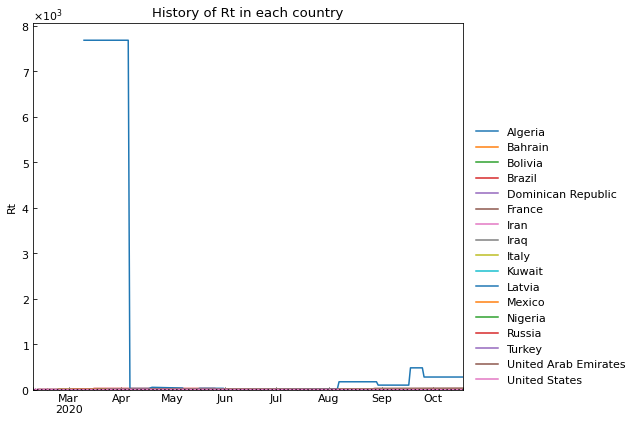

Country,Algeria,Bahrain,Bolivia,Brazil,Dominican Republic,France,Iran,Iraq,Italy,Kuwait,Latvia,Mexico,Nigeria,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,
2020-10-15,1.49,0.77,0.64,1.04,0.67,34.11,1.55,1.11,4.45,1.03,278.72,1.13,0.92,2.11,1.43,0.91,2.42
2020-10-16,1.49,0.77,0.64,1.04,0.67,34.11,1.55,1.11,4.45,1.03,278.72,1.13,0.92,2.11,1.43,0.91,2.42
2020-10-17,1.49,0.77,0.64,1.04,0.67,34.11,1.55,1.11,4.45,1.03,278.72,1.13,0.92,2.11,1.43,0.91,2.42
2020-10-18,1.49,0.77,0.64,1.04,0.67,34.11,1.55,1.11,4.45,1.03,278.72,1.13,0.92,2.11,1.43,0.91,2.42
2020-10-19,1.49,0.77,0.64,1.04,0.67,34.11,1.55,1.11,4.45,1.03,278.72,1.13,0.92,2.11,1.43,0.91,2.42


In [14]:
analyser.param_history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

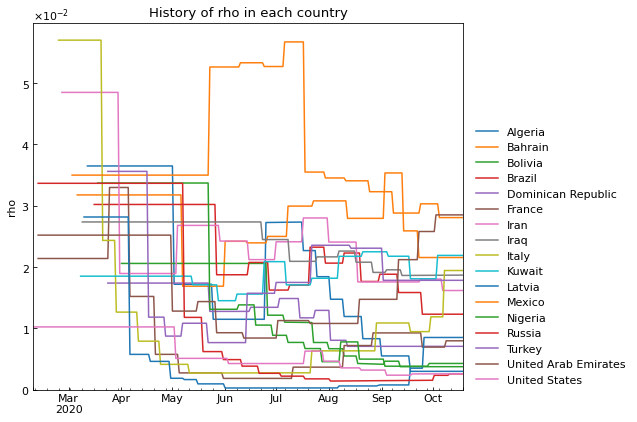

Country,Algeria,Bahrain,Bolivia,Brazil,Dominican Republic,France,Iran,Iraq,Italy,Kuwait,Latvia,Mexico,Nigeria,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,
2020-10-15,0.002994,0.021558,0.003753,0.012313,0.007073,0.007973,0.016177,0.01869,0.019438,0.021903,0.008517,0.028069,0.00428,0.002584,0.017837,0.028509,0.002593
2020-10-16,0.002994,0.021558,0.003753,0.012313,0.007073,0.007973,0.016177,0.01869,0.019438,0.021903,0.008517,0.028069,0.00428,0.002584,0.017837,0.028509,0.002593
2020-10-17,0.002994,0.021558,0.003753,0.012313,0.007073,0.007973,0.016177,0.01869,0.019438,0.021903,0.008517,0.028069,0.00428,0.002584,0.017837,0.028509,0.002593
2020-10-18,0.002994,0.021558,0.003753,0.012313,0.007073,0.007973,0.016177,0.01869,0.019438,0.021903,0.008517,0.028069,0.00428,0.002584,0.017837,0.028509,0.002593
2020-10-19,0.002994,0.021558,0.003753,0.012313,0.007073,0.007973,0.016177,0.01869,0.019438,0.021903,0.008517,0.028069,0.00428,0.002584,0.017837,0.028509,0.002593


In [15]:
analyser.param_history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

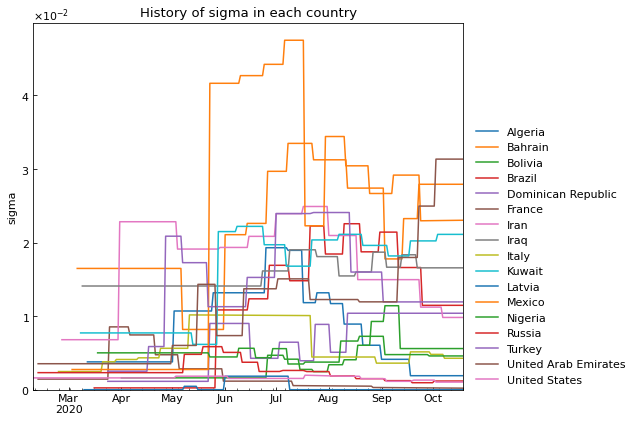

Country,Algeria,Bahrain,Bolivia,Brazil,Dominican Republic,France,Iran,Iraq,Italy,Kuwait,Latvia,Mexico,Nigeria,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,
2020-10-15,0.001903,0.027924,0.005593,0.011469,0.010392,0.00021,0.009822,0.016565,0.004273,0.021114,0.0,0.023035,0.004589,0.001184,0.011934,0.031345,0.001034
2020-10-16,0.001903,0.027924,0.005593,0.011469,0.010392,0.00021,0.009822,0.016565,0.004273,0.021114,0.0,0.023035,0.004589,0.001184,0.011934,0.031345,0.001034
2020-10-17,0.001903,0.027924,0.005593,0.011469,0.010392,0.00021,0.009822,0.016565,0.004273,0.021114,0.0,0.023035,0.004589,0.001184,0.011934,0.031345,0.001034
2020-10-18,0.001903,0.027924,0.005593,0.011469,0.010392,0.00021,0.009822,0.016565,0.004273,0.021114,0.0,0.023035,0.004589,0.001184,0.011934,0.031345,0.001034
2020-10-19,0.001903,0.027924,0.005593,0.011469,0.010392,0.00021,0.009822,0.016565,0.004273,0.021114,0.0,0.023035,0.004589,0.001184,0.011934,0.031345,0.001034


In [16]:
analyser.param_history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

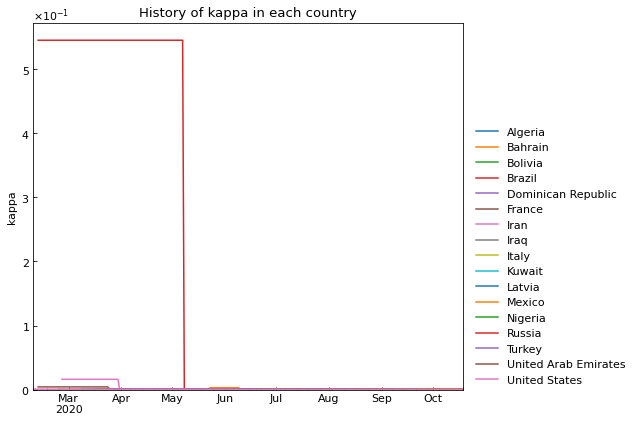

Country,Algeria,Bahrain,Bolivia,Brazil,Dominican Republic,France,Iran,Iraq,Italy,Kuwait,Latvia,Mexico,Nigeria,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,
2020-10-15,0.000059,0.000071,0.000292,0.000183,0.000152,0.000024,0.000011,0.000054,0.000096,0.000117,0.000031,0.000841,0.00005,0.000041,0.000067,0.000002,0.000037
2020-10-16,0.000059,0.000071,0.000292,0.000183,0.000152,0.000024,0.000011,0.000054,0.000096,0.000117,0.000031,0.000841,0.00005,0.000041,0.000067,0.000002,0.000037
2020-10-17,0.000059,0.000071,0.000292,0.000183,0.000152,0.000024,0.000011,0.000054,0.000096,0.000117,0.000031,0.000841,0.00005,0.000041,0.000067,0.000002,0.000037
2020-10-18,0.000059,0.000071,0.000292,0.000183,0.000152,0.000024,0.000011,0.000054,0.000096,0.000117,0.000031,0.000841,0.00005,0.000041,0.000067,0.000002,0.000037
2020-10-19,0.000059,0.000071,0.000292,0.000183,0.000152,0.000024,0.000011,0.000054,0.000096,0.000117,0.000031,0.000841,0.00005,0.000041,0.000067,0.000002,0.000037


In [17]:
analyser.param_history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

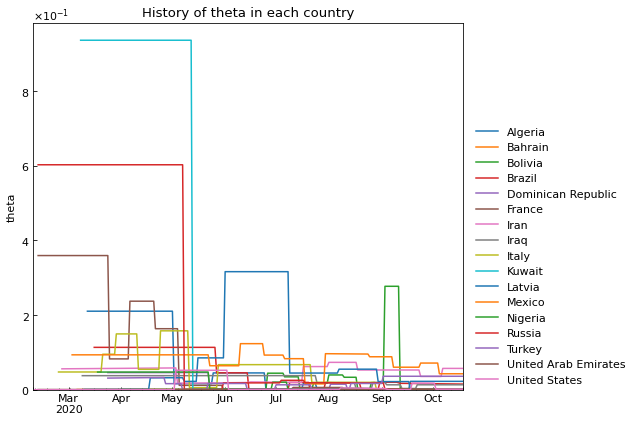

Country,Algeria,Bahrain,Bolivia,Brazil,Dominican Republic,France,Iran,Iraq,Italy,Kuwait,Latvia,Mexico,Nigeria,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,
2020-10-15,0.022395,0.001098,0.000126,0.015081,0.000067,0.000958,0.057058,0.013109,0.000528,0.000966,0.000459,0.042702,0.000224,0.000019,0.036001,0.001274,0.001446
2020-10-16,0.022395,0.001098,0.000126,0.015081,0.000067,0.000958,0.057058,0.013109,0.000528,0.000966,0.000459,0.042702,0.000224,0.000019,0.036001,0.001274,0.001446
2020-10-17,0.022395,0.001098,0.000126,0.015081,0.000067,0.000958,0.057058,0.013109,0.000528,0.000966,0.000459,0.042702,0.000224,0.000019,0.036001,0.001274,0.001446
2020-10-18,0.022395,0.001098,0.000126,0.015081,0.000067,0.000958,0.057058,0.013109,0.000528,0.000966,0.000459,0.042702,0.000224,0.000019,0.036001,0.001274,0.001446
2020-10-19,0.022395,0.001098,0.000126,0.015081,0.000067,0.000958,0.057058,0.013109,0.000528,0.000966,0.000459,0.042702,0.000224,0.000019,0.036001,0.001274,0.001446


In [18]:
analyser.param_history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76915 entries, 0 to 77138
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 76915 non-null  datetime64[ns]
 1   Country                              76915 non-null  object        
 2   Rt                                   76915 non-null  float64       
 3   theta                                76915 non-null  float64       
 4   kappa                                76915 non-null  float64       
 5   rho                                  76915 non-null  float64       
 6   sigma                                76915 non-null  float64       
 7   School_closing                       76915 non-null  int64         
 8   Workplace_closing                    76915 non-null  int64         
 9   Cancel_events                        76915 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.121386,-0.075218,0.337322,-0.146933,-0.181864,-0.199836,-0.095567,-0.114691,-0.091071,-0.150895,-0.214521,-0.059635,-0.177848,-0.344414,-0.284993,-0.162571
theta,-0.121386,1.000000,0.882919,0.591385,0.038471,-0.099340,-0.073710,-0.216170,-0.102426,-0.106866,0.226842,0.074397,0.067549,-0.311999,-0.221116,0.026366,-0.046554
kappa,-0.075218,0.882919,1.000000,0.691527,0.020115,-0.108480,-0.093665,-0.105642,-0.071053,-0.063889,0.269353,0.191641,0.204272,-0.346724,-0.188759,-0.020405,-0.016548
rho,0.337322,0.591385,0.691527,1.000000,0.212503,-0.111550,-0.136621,-0.057106,-0.018483,-0.009477,0.199315,0.193697,0.126025,-0.409155,-0.422852,-0.268538,-0.006305
sigma,-0.146933,0.038471,0.020115,0.212503,1.000000,0.280700,0.089926,0.246153,0.115844,0.201018,0.219170,0.285930,0.049835,0.018088,-0.050360,0.083876,0.245887
School_closing,-0.181864,-0.099340,-0.108480,-0.111550,0.280700,1.000000,0.738128,0.709727,0.584897,0.543576,0.630458,0.536985,0.393668,0.569040,0.325840,0.268924,0.806932
Workplace_closing,-0.199836,-0.073710,-0.093665,-0.136621,0.089926,0.738128,1.000000,0.616938,0.602487,0.518852,0.632481,0.436664,0.388560,0.700843,0.349299,0.378276,0.814997
Cancel_events,-0.095567,-0.216170,-0.105642,-0.057106,0.246153,0.709727,0.616938,1.000000,0.682191,0.568606,0.521999,0.559993,0.652380,0.628839,0.285607,0.287302,0.815084
Gatherings_restrictions,-0.114691,-0.102426,-0.071053,-0.018483,0.115844,0.584897,0.602487,0.682191,1.000000,0.744693,0.628746,0.672737,0.601312,0.564464,0.243519,0.132866,0.848238
Transport_closing,-0.091071,-0.106866,-0.063889,-0.009477,0.201018,0.543576,0.518852,0.568606,0.744693,1.000000,0.581461,0.629738,0.554816,0.313260,-0.016662,-0.124239,0.761587


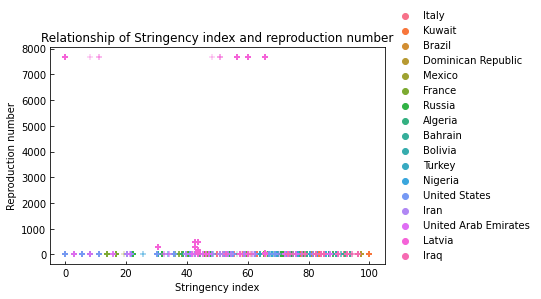

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()